In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#preparing and cleaning data
db=pd.read_csv("Salary_Data_Based_country_and_race.csv")
db.loc[db["Education Level"]=="Bachelor's Degree", "Education Level"]="Bachelor's"
db.loc[db["Education Level"]=="phD", "Education Level"]="PhD"
db.loc[db["Education Level"]=="Master's Degree", "Education Level"]="Master's"
print(db.head())


   Unnamed: 0   Age  Gender Education Level          Job Title  \
0           0  32.0    Male      Bachelor's  Software Engineer   
1           1  28.0  Female        Master's       Data Analyst   
2           2  45.0    Male             PhD     Senior Manager   
3           3  36.0  Female      Bachelor's    Sales Associate   
4           4  52.0    Male        Master's           Director   

   Years of Experience    Salary Country      Race  
0                  5.0   90000.0      UK     White  
1                  3.0   65000.0     USA  Hispanic  
2                 15.0  150000.0  Canada     White  
3                  7.0   60000.0     USA  Hispanic  
4                 20.0  200000.0     USA     Asian  


<Axes: >

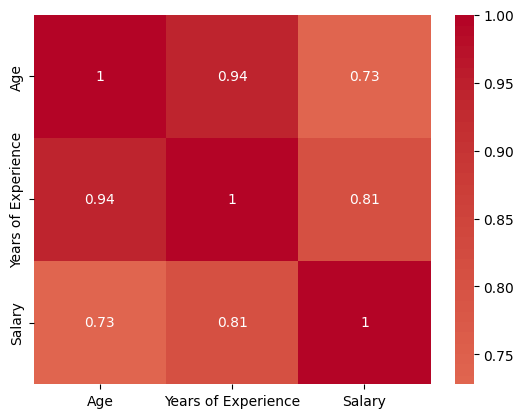

In [2]:
sns.heatmap(db[["Age", "Years of Experience", "Salary"]].corr(), annot=True, cmap="coolwarm", center=0)

C:\Users\stefa\AppData\Local\Temp\ipykernel_26140\294739284.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


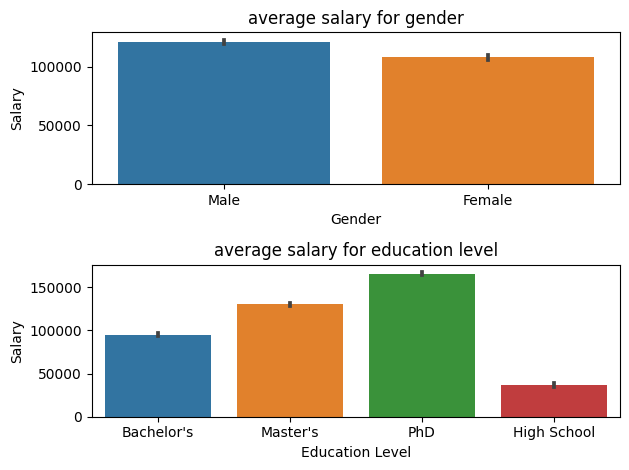

In [3]:
fig,(ax1,ax2)=plt.subplots(nrows=2,ncols=1)
sns.barplot(x="Gender", y="Salary", data=db.query("Gender=='Male' or Gender=='Female'"), ax=ax1)
ax1.set_title("average salary for gender")
plt.tight_layout()
sns.barplot(x="Education Level", y=("Salary"), data=db, ax=ax2)
ax2.set_title("average salary for education level")
plt.tight_layout()
# print(db.query("Gender=='Male' or Gender=='Female'"))

LinearRegression(slope=4319.482946438988, intercept=76416.38474182725)


Text(0.5, 1.0, 'relation between salary and years of experience')

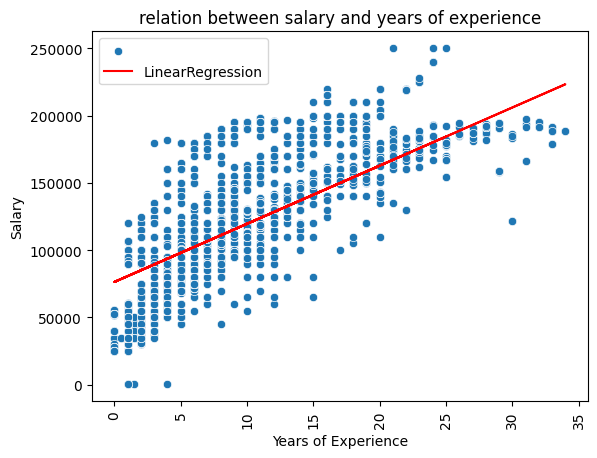

In [4]:

# fig,(ax1,ax2)=plt.subplots(nrows=2,ncols=1)
import statistics as st
sns.scatterplot(x="Years of Experience", y="Salary", data=db)
plt.xticks(rotation=90)
expyear=[x for x in db["Years of Experience"].drop_duplicates().sort_values()][:-1]
avgsal=((db[["Salary","Years of Experience"]].groupby("Years of Experience")).mean()["Salary"]).reset_index()
print(st.linear_regression(expyear,list(avgsal["Salary"])))
intercept=76416.38474182725
slope=4319.482946438988
plt.plot(db["Years of Experience"],intercept+slope*db["Years of Experience"], color="red")
plt.legend(["","LinearRegression"])
plt.title("relation between salary and years of experience")
# print(avgsal)

   Unnamed: 0   Age  Gender Education Level          Job Title  \
0           0  32.0    Male      Bachelor's  Software Engineer   
1           1  28.0  Female        Master's       Data Analyst   
2           2  45.0    Male             PhD     Senior Manager   
3           3  36.0  Female      Bachelor's    Sales Associate   
4           4  52.0    Male        Master's           Director   

   Years of Experience    Salary Country      Race  
0                  5.0   90000.0      UK     White  
1                  3.0   65000.0     USA  Hispanic  
2                 15.0  150000.0  Canada     White  
3                  7.0   60000.0     USA  Hispanic  
4                 20.0  200000.0     USA     Asian  


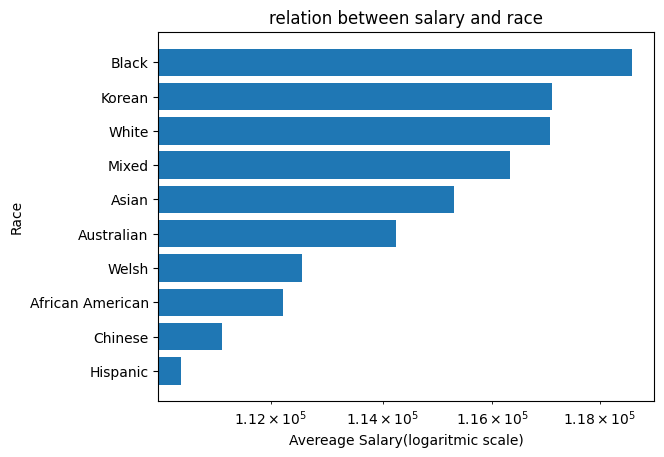

In [5]:
print(db.head())
gru=(db[["Salary","Race"]].groupby("Race").mean()["Salary"]).reset_index().sort_values(by="Salary")
plt.barh(gru["Race"], gru["Salary"])
plt.ylabel("Race")
plt.xlabel("Avereage Salary(logaritmic scale)")
plt.title("relation between salary and race")
plt.xscale("log")
plt.show()



                    Job Title         Salary
190             VP of Finance  200000.000000
28   Director of Data Science  204561.403509
8          Chief Data Officer  220000.000000
7                         CEO  250000.000000
9    Chief Technology Officer  250000.000000


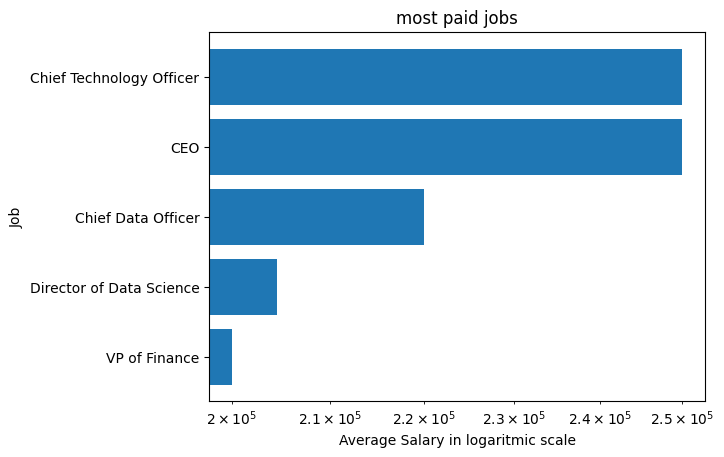

In [6]:
# print(db.head())
job=db[["Salary", "Job Title"]].groupby("Job Title").mean()["Salary"].reset_index().sort_values(by="Salary",ascending=False)
jobpaid=job.head(5).sort_values(by="Salary")
jobunpaid=job[:-1].tail(5).sort_values(by="Salary")
print(jobpaid)

# fig,(ax1,ax2)=plt.subplots(nrows=2,ncols=1)
plt.barh(jobpaid["Job Title"],jobpaid["Salary"])
plt.title("most paid jobs")
plt.xticks(rotation=90)
plt.tight_layout
plt.xlabel("Average Salary in logaritmic scale")
plt.ylabel("Job")
plt.xscale("log")
plt.show()

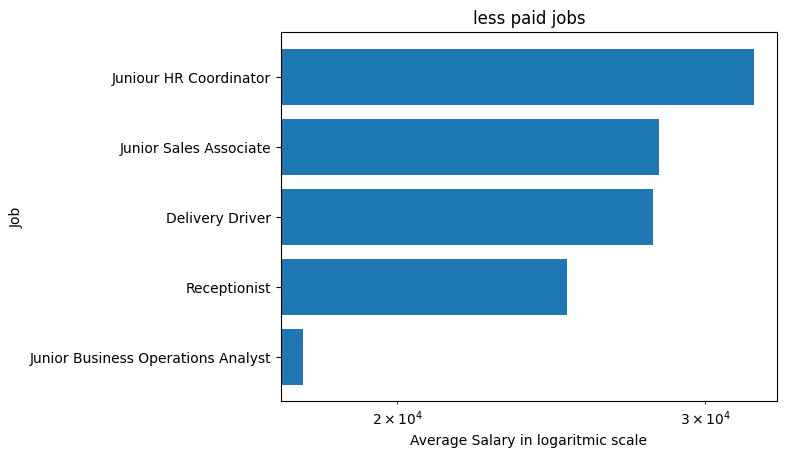

In [7]:
plt.barh(jobunpaid["Job Title"],jobunpaid["Salary"])
plt.title("less paid jobs")
plt.xlabel("Average Salary in logaritmic scale")
plt.ylabel("Job")
plt.xscale("log")

   Unnamed: 0   Age  Gender Education Level          Job Title  \
0           0  32.0    Male      Bachelor's  Software Engineer   
1           1  28.0  Female        Master's       Data Analyst   
2           2  45.0    Male             PhD     Senior Manager   
3           3  36.0  Female      Bachelor's    Sales Associate   
4           4  52.0    Male        Master's           Director   

   Years of Experience    Salary Country      Race  
0                  5.0   90000.0      UK     White  
1                  3.0   65000.0     USA  Hispanic  
2                 15.0  150000.0  Canada     White  
3                  7.0   60000.0     USA  Hispanic  
4                 20.0  200000.0     USA     Asian  
               Race  count
0          Hispanic    322
1             Welsh    333
2             Mixed    334
3  African American    354
4             Black    437
5           Chinese    444
6        Australian    452
7            Korean    457
8             Asian   1603
9             W

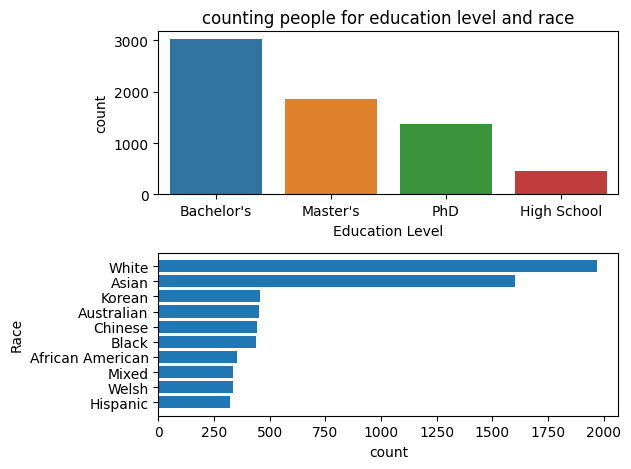

In [8]:
print(db.head())
fig,(ax1,ax2)=plt.subplots(nrows=2,ncols=1)
sns.countplot(x="Education Level",  data=db, ax=ax1)
ax1.set_title("counting people for education level and race")
racecount=db["Race"].value_counts(ascending=True).reset_index()
print(racecount)
ax2.barh(racecount["Race"], racecount["count"])
plt.xlabel("count")
plt.ylabel("Race")
plt.tight_layout()

In [21]:
#Preparing data for machine learning
# db=db.drop(columns=["Unnamed: 0"])
from sklearn.preprocessing import MinMaxScaler, RobustScaler, OneHotEncoder, PolynomialFeatures
db1=pd.DataFrame()
db2=pd.DataFrame()
db1=db.copy()
z=RobustScaler()
db1[["Age","Years of Experience","Salary"]]=z.fit_transform(db[["Age","Years of Experience","Salary"]])
# db2[["Age","Years of Experience","Salary"]]=MinMaxScaler().fit_transform(db[["Age","Years of Experience","Salary"]])
db1.loc[db1["Gender"]=="Female","Gender"]=0.0
db1.loc[db1["Gender"]=="Male","Gender"]=1.0
db1.loc[db1["Gender"]=="Other","Gender"]=0.5
db1.loc[db1["Education Level"]=="PhD","Education Level"]=4.0
db1.loc[db1["Education Level"]=="Master's","Education Level"]=3.0
db1.loc[db1["Education Level"]=="Bachelor's","Education Level"]=2.0
db1.loc[db1["Education Level"]=="High School","Education Level"]=1.0
db1.dropna(inplace=True)
# print(db1["Country"].value_counts())
x=OneHotEncoder(sparse_output=False)
db1["usa"],db1["China"],db1["australia"],db1["Uk"],db1["canada"]=x.fit_transform(db1[["Country"]]).T
db1=db1.drop(columns=["Country","Job Title"])
# print(db1["Race"].value_counts())
db1["white"],db1["asian"],db1["korean"],db1["australia"],db1["chinese"],db1["black"],db1["africanamerican"],db1["mixed"],db1["welsh"],db1["hispanic"]=x.fit_transform(db1[["Race"]]).T
db1=db1.drop(columns=["Race"])
db1["Education Level"]=db1["Education Level"].astype(float)
db1["Gender"]=db1["Gender"].astype(float)
cor=db1.corr().stack().reset_index()
cor.columns=["var1","var2","cor"]
cor=cor[cor["var1"]!=cor["var2"]].sort_values(by="cor", ascending=False)



from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif=vif.sort_values(by=["VIF"],ascending=False)
    return vif
# print(cal_vif(db1))



# print(db1.dtypes)
# print(db.head())
db.dropna(inplace=True)
# print(db1.head())




from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier
x=db1.drop(columns=["Salary"])
y=db1["Salary"]
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x)
# model2=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1, random_state=42)
# model3=SVR(kernel="linear")
model=LinearRegression()
result=cross_validate(model,x,y, cv=10)
print(result["test_score"].mean())

model=LinearRegression()
grid = {
    'fit_intercept': [True, False]
    
}

search=GridSearchCV(estimator=model, param_grid=grid, cv=5)

xtrain,xtest,ytrain,ytest=train_test_split(x_poly,y,train_size=0.7, random_state=0)
search.fit(xtrain,ytrain)
# search.fit(xtrain,ytrain)
bestmodel=search.best_estimator_

pred=bestmodel.predict(xtest)
print(r2_score(ytest,pred))
df=pd.DataFrame({"pred":pred})
print(df)
# pred=pred.reshape(-1,1)
db3=db.copy()
p=RobustScaler()
db3["Salary"]=p.fit_transform(db3[["Salary"]])
# db3["Salary"]=p.inverse_transform(db3[["Salary"]])
# pr=pd.DataFrame(pred)
# pr.columns=["salary"]
# pr["salary"]=p.inverse_transform(pr[["salary"]])
df["pred"]=p.inverse_transform(df[["pred"]])
print(df.head())
# pred=p.inverse_transform(pred)
# print(db3.head())
# print(pr)


0.5460631478484868
0.8655803821016599
          pred
0     1.035775
1     0.131762
2    -0.613806
3     0.078669
4    -0.749543
...        ...
2005  0.686401
2006  0.630603
2007 -0.587327
2008  0.657964
2009  0.745184

[2010 rows x 1 columns]
            pred
0  208219.791135
1  126858.575200
2   59757.481127
3  122080.211794
4   47541.148901
